In [11]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline 

In [2]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [3]:
df = pd.read_csv("kenya_data/diaries_transactions_all.csv", dtype={'account_startclose_balance': str})

In [4]:
df.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,2013_10,08sep2012,58134738501900000,1.0,58134383397900000,NaN,Asset,Close,Informal,Less liquid,02oct2013,02oct2013,0,0,108138072959900000,58134383397900000,02oct2013,10,2013,2013_10,18.0,394,13,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2731,Friends and Family: Lending,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24sep2012,19sep2013,360,12,04=Diaries Interview,22apr2013,4,2013,2013_04,20aug2012,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16aug2012,31dec2013,502,17,59136660314000000,59134423954300000,21apr2013,4,2013,2013_04,10.0,209,7,248,8,cash,"Cash (Cash on hand; cash lost, stolen or missing)",CASH,Cash,3499,Cash on hand now,Cash on hand now (end of period),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,2013_10,05sep2012,56134804374600000,NaN,65134441430300000,NaN,Liability,Close,Informal,NaN,17oct2012,02oct2013,350,12,105138073330800000,65134441430300000,02oct2013,10,2013,2013_10,17.0,377,13,350,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21sep2012,01nov2013,406,14,04=Diaries Interview,21feb2013,2,2013,2013_02,07sep2012,61135001772200000,NaN,61134425330400000,NaN,Asset,NaN,Informal,More liquid,12oct2012,02oct2013,355,12,61136151231700000,61134425330400000,07feb2013,2,2013,2013_02,6.0,139,4,118,4,findev,"Borrowing, lending, savings or insurance media...",INFSAVHOM,Informal savings: keep money at home,3405,Keeping Money (Cash) at Home,3. Withdrawals,Withdrawal on financial asset,0.0,Decrease,1.0,Cash,NaN,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20sep2012,18oct2013,393,13,04=Diaries Interview,02may2013,5,2013,2013_05,29aug2012,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16aug2012,31dec2013,502,17,61136746749000000,61134468689200000,28mar2013,3,2013,2013_03,8.0,189,6,224,7,opex,Operational (Personal or household) expenditur...,COMM,Communications,2787,Pre-paid phone credit and data bundles,Purchases,NaN,NaN,NaN,1.0,Cash,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


In [6]:
dfb = df[(df["trx_family_code"]=="FRMLN")&(df["trx_type_code"]==2760)]

In [48]:
len(dfb["account_ids"].unique())

48

## No interests?

In [28]:
dfb["trx_prx_purpose"].unique()

array(['6. Closing Balance--End of last DQ',
       '1. Starting balance (today)', '5. Interest accruing',
       '3. Payments', 'INCREASE--Unexplained balance adjustment',
       '4. Any known fees', 'DECREASE--Unexplained balance adjustment',
       '7. Refund from lender', '2. New borrowing'], dtype=object)

In [31]:
len(dfb[dfb["trx_prx_purpose"]=="5. Interest accruing"]["account_ids"].unique())

11

### Only interests in 11 out of 48 loans.

In [32]:
len(dfb[dfb["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment"]["account_ids"].unique())

5

In [33]:
len(dfb[dfb["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment"]["account_ids"].unique())

7

In [34]:
len(dfb[dfb["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["account_ids"].unique())

45

### 3 accounts don't have a closing balance.

In [46]:
clos_bal = []
for acc in dfb[dfb["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["account_ids"].unique():
    clos = dfb[(dfb["trx_prx_purpose"]=="6. Closing Balance--End of last DQ")&(dfb["account_ids"]==acc)]["trx_value_kes"]
    clos_bal.append(clos.values[0])

In [47]:
clos_bal

[101300.0,
 21250.0,
 0.0,
 0.0,
 253608.0,
 78600.0,
 0.0,
 2700.0,
 0.0,
 0.0,
 210580.0,
 8250.0,
 102000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2000.0,
 2100.0,
 0.0,
 251391.0,
 0.0,
 0.0,
 -1000.0,
 17900.0,
 51150.0,
 0.0,
 66350.0,
 110000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 35000.0,
 0.0,
 0.0,
 0.0,
 135000.0,
 0.0,
 4650.0,
 19534.0,
 77500.0,
 26920.0,
 42000.0,
 35000.0]

## One single account

In [17]:
acc = random.choice(dfb["account_ids"].unique())

In [18]:
print(acc)

60134978362300000


acc = 60134978362300000

In [19]:
lna = dfb[dfb["account_ids"]==acc]

In [21]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

Error neither increase nor decrease at index14332


In [25]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index)+ ":" + row["trx_prx_purpose"])b

Error neither increase nor decrease at index14332:6. Closing Balance--End of last DQ


In [ ]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [51]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s
lna[["account_ids","trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,account_ids,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
25909,60134978362300000,0,88000.0,1. Starting balance (today),NaN,Increase,88000.0,88000.0
273151,60134978362300000,14,2500.0,3. Payments,Outflow,Decrease,-2500.0,85500.0
58771,60134978362300000,21,2700.0,3. Payments,Outflow,Decrease,-2700.0,82800.0
273153,60134978362300000,28,2700.0,3. Payments,Outflow,Decrease,-2700.0,80100.0
382770,60134978362300000,35,2700.0,3. Payments,Outflow,Decrease,-2700.0,77400.0
149075,60134978362300000,42,2700.0,3. Payments,Outflow,Decrease,-2700.0,74700.0
273157,60134978362300000,49,2600.0,3. Payments,Outflow,Decrease,-2600.0,72100.0
306693,60134978362300000,54,1000.0,3. Payments,Outflow,Decrease,-1000.0,71100.0
328767,60134978362300000,56,2200.0,3. Payments,Outflow,Decrease,-2200.0,68900.0
417392,60134978362300000,63,2200.0,3. Payments,Outflow,Decrease,-2200.0,66700.0


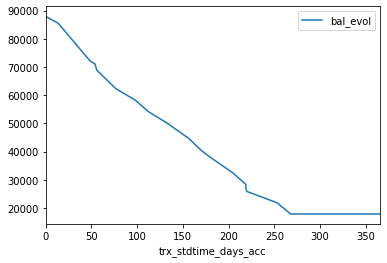

In [27]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## We now try to define an outcome for this one account.

In [85]:
lna[lna["trx_prx_purpose"]=="3. Payments"]["trx_value_kes"].describe()

count      25.000000
mean     2804.000000
std      1272.376386
min      1000.000000
25%      2100.000000
50%      2500.000000
75%      4000.000000
max      6100.000000
Name: trx_value_kes, dtype: float64

In [58]:
lna.insert(lna.shape[1],"time_since_last_payment",np.full(lna.shape[0],np.nan) )

In [67]:
lna.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,...,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir,bal_evol,time_since_last_payment
25909,KVIHK40,NaN,10sep2012,03oct2013,388,13,03=Q3,02oct2012,10,2012,2012_10,04sep2012,60134978362300000,1.0,60134547419200000,NaN,Liability,Start,Formal,NaN,02oct2012,03oct2013,366,12,60136610859400000,60134547419200000,02oct2012,10,2012,2012_10,...,22,0,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,88000.0,1035.29400,0,NaN,NaN,NaN,0.758621,88000.0,88000.0,NaN
273151,KVIHK40,NaN,10sep2012,03oct2013,388,13,04=Diaries Interview,23oct2012,10,2012,2012_10,04sep2012,60134978362300000,NaN,60134547419200000,NaN,Liability,NaN,Formal,NaN,02oct2012,03oct2013,366,12,60135097913200000,60134547419200000,16oct2012,10,2012,2012_10,...,36,1,14,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,09=At home or work (self or collector/agent),Outflow,2500.0,29.41176,0,NaN,NaN,NaN,1.241379,-2500.0,85500.0,NaN
58771,KVIHK40,NaN,10sep2012,03oct2013,388,13,04=Diaries Interview,14nov2012,11,2012,2012_11,04sep2012,60134978362300000,NaN,60134547419200000,NaN,Liability,NaN,Formal,NaN,02oct2012,03oct2013,366,12,60135291015300000,60134547419200000,23oct2012,10,2012,2012_10,...,43,1,21,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,2700.0,31.76471,0,NaN,NaN,NaN,1.482759,-2700.0,82800.0,NaN
273153,KVIHK40,NaN,10sep2012,03oct2013,388,13,04=Diaries Interview,14nov2012,11,2012,2012_11,04sep2012,60134978362300000,NaN,60134547419200000,NaN,Liability,NaN,Formal,NaN,02oct2012,03oct2013,366,12,60135291019600000,60134547419200000,30oct2012,10,2012,2012_10,...,50,1,28,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,2700.0,31.76471,0,NaN,NaN,NaN,1.724138,-2700.0,80100.0,NaN
382770,KVIHK40,NaN,10sep2012,03oct2013,388,13,04=Diaries Interview,14nov2012,11,2012,2012_11,04sep2012,60134978362300000,NaN,60134547419200000,NaN,Liability,NaN,Formal,NaN,02oct2012,03oct2013,366,12,60135291013200000,60134547419200000,06nov2012,11,2012,2012_11,...,57,1,35,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,2700.0,31.76471,0,NaN,NaN,NaN,1.965517,-2700.0,77400.0,NaN


In [71]:
# first index in dataframe
l =  lna[lna["trx_prx_purpose"]=="3. Payments"].index[0]
for index, row in lna.iterrows():
    if index == l:
        continue
    elif row["trx_prx_purpose"] == "3. Payments":
        lna.at[index,"time_since_last_payment"]=lna.loc[index,"trx_stdtime_days_acc"]-lna.loc[l,"trx_stdtime_days_acc"]
        l = index
    else: 
        print(lna.loc[index,"trx_prx_purpose"])
        

1. Starting balance (today)
6. Closing Balance--End of last DQ


In [73]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol","time_since_last_payment"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol,time_since_last_payment
25909,0,88000.0,1. Starting balance (today),NaN,Increase,88000.0,88000.0,NaN
273151,14,2500.0,3. Payments,Outflow,Decrease,-2500.0,85500.0,NaN
58771,21,2700.0,3. Payments,Outflow,Decrease,-2700.0,82800.0,7.0
273153,28,2700.0,3. Payments,Outflow,Decrease,-2700.0,80100.0,7.0
382770,35,2700.0,3. Payments,Outflow,Decrease,-2700.0,77400.0,7.0
149075,42,2700.0,3. Payments,Outflow,Decrease,-2700.0,74700.0,7.0
273157,49,2600.0,3. Payments,Outflow,Decrease,-2600.0,72100.0,7.0
306693,54,1000.0,3. Payments,Outflow,Decrease,-1000.0,71100.0,5.0
328767,56,2200.0,3. Payments,Outflow,Decrease,-2200.0,68900.0,2.0
417392,63,2200.0,3. Payments,Outflow,Decrease,-2200.0,66700.0,7.0


In [74]:
lna["time_since_last_payment"].describe()

count    24.000000
mean     10.583333
std       8.535943
min       0.000000
25%       7.000000
50%       7.000000
75%      14.250000
max      33.000000
Name: time_since_last_payment, dtype: float64

In [160]:
loans = pd.DataFrame(columns=["hh_ids","account_ids", "m_ids_owner","start_bal_kes", "clos_bal_kes", "interests_kes", "num_new_borrowing", "mean_borrowing_kes", "tot_acc_daysofobs", "mean_pay_int_days","sd_pay_int_days","mean_pay_height_kes","sd_pay_height_kes"] )

In [212]:
i = 0
for acc in (dfb["account_ids"].unique()):
    print(acc)
    # get household corresponding to the loan
    if len(dfb[dfb["account_ids"]==acc]["hh_ids"].unique())==1:
        hh = dfb[dfb["account_ids"]==acc]["hh_ids"].unique()[0]
    else:
        print("Error: account associated to several accounts.")
    
    #get account owner id
    if len(dfb[dfb["account_ids"]==acc]["m_ids_owner"].unique())==1:
        if "HH" in dfb[dfb["account_ids"]==acc]["m_ids_owner"].unique():
            ind_id = "HH"
        else:
            ind_id = int(dfb[dfb["account_ids"]==acc]["m_ids_owner"].unique()[0])
    else:
        print("Error: account associated to several individuals.")
        print(dfb[dfb["m_ids_owner"]==acc]["m_ids_owner"].unique())
        break
        
    #get total number of observation days
    if len(dfb[dfb["account_ids"]==acc]["tot_acc_daysofobs"].unique())==1:
        obs_days = dfb[dfb["account_ids"]==acc]["tot_acc_daysofobs"].unique()[0]
    else:
        print("Error: several different observation lengths.")
      
    #create new dataset with values sorted according to the day of transaction
    lna = dfb[dfb["account_ids"]==acc]
    lna = lna.sort_values("trx_stdtime_days_acc")
    
    #get starting balance
    start_bal = np.nan
    new_borrowings = np.nan
    mean_new_borrowings = np.nan
    if lna[lna["trx_prx_purpose"]=="1. Starting balance (today)"].shape[0]==1:
        start_bal = lna[lna["trx_prx_purpose"]=="1. Starting balance (today)"]["trx_value_kes"].unique()[0]
        new_borrowings = lna[lna["trx_prx_purpose"]=="2. New borrowing"].shape[0]
        all_borrow = lna[(lna["trx_prx_purpose"]=="2. New borrowing")|(lna["trx_prx_purpose"]=="1. Starting balance (today)")]
        # we want to exclude all new borrowings or starting balances that are 0
        mean_new_borrowings = all_borrow[all_borrow["trx_value_kes"]>0]["trx_value_kes"].mean()
    elif lna[lna["trx_prx_purpose"]=="1. Starting balance (today)"].shape[0]>1:
        print("Error: several starting balances")
    #if there is no starting balance at all
    elif lna[lna["trx_prx_purpose"]=="2. New borrowing"].shape[0]==1:
        start_bal = lna[lna["trx_prx_purpose"]=="2. New borrowing"]["trx_value_kes"].unique()[0]
        new_borrowings = 0
        mean_new_borrowings= start_bal
    elif lna[lna["trx_prx_purpose"]=="2. New borrowing"].shape[0]>1:
        start_bal = lna[lna["trx_prx_purpose"]=="2. New borrowing"].iloc[0,lna.columns.get_loc("trx_value_kes")]
        new_borrowings = lna[lna["trx_prx_purpose"]=="2. New borrowing"].shape[0]-1
        mean_new_borrowings = lna[lna["trx_prx_purpose"]=="2. New borrowing"]["trx_value_kes"].mean()
    else: 
        print("Error: no starting balance or new borrowing")
    
    #get total iterests accrued
    interests = 0
    interests = lna[lna["trx_prx_purpose"]=="5. Interest accruing"]["trx_value_kes"].sum()
    
    #get closing balance
    close_bal = np.nan
    if lna[lna["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"].shape[0]==1:
        close_bal = lna[lna["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["trx_value_kes"].unique()[0]
    elif lna[lna["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"].shape[0]>1:
        print("Error: several closing balances.")
    else: 
        print("Error: no closing balance.")

    hei_mean,hei_sd,inter_mean,inter_sd = np.nan, np.nan, np.nan, np.nan
    #get the height of payments
    if lna[lna["trx_prx_purpose"]=="3. Payments"].shape[0]>0:
        hei_mean = lna[lna["trx_prx_purpose"]=="3. Payments"]["trx_value_kes"].mean()
        hei_sd = lna[lna["trx_prx_purpose"]=="3. Payments"]["trx_value_kes"].std()
        
        ##get the intervals between payments
        lna.insert(lna.shape[1],"time_since_last_payment",np.full(lna.shape[0],np.nan))
        ## first index in dataframe
        l =  lna[lna["trx_prx_purpose"]=="3. Payments"].index[0]
        for index, row in lna.iterrows():
            #there is no payment interval before the first payment
            if index == l:
                continue
            elif row["trx_prx_purpose"] == "3. Payments":
                lna.at[index,"time_since_last_payment"]=lna.loc[index,"trx_stdtime_days_acc"]-lna.loc[l,"trx_stdtime_days_acc"]
                l = index
        inter_mean = lna["time_since_last_payment"].mean()
        inter_sd = lna["time_since_last_payment"].std()
    
    loans.loc[i]=[hh,int(acc),ind_id,start_bal, close_bal, interests, new_borrowings, mean_new_borrowings, obs_days,inter_mean,inter_sd,hei_mean,hei_sd]
    i += 1

60137430710900000
105136540140100000
56134761927800000
105137049319900000
56134798164800000
59134726342000000
59134753176900000
Error: no closing balance.
59134691680100000
Error: no closing balance.
59134666467600000
Error: several starting balances
105137769890900000
59134727113000000
59135021173400000
60136531885600000
59136376033300000
60136436488300000
56135290200100000
60134752045800000
60134787021500000
105137414874400000
58134763288300000
61134770676600000
84136514083500000
Error: no starting balance or new borrowing
59136685821800000
59135288408400000
Error: no starting balance or new borrowing
60138558075900000
59134942516400000
62134821651800000
59134752569200000
Error: several closing balances.
59135900709000000
84136879000800000
59134865220800000
Error: several closing balances.
59136386375100000
111137291327800000
105137636847800000
60134978362300000
59135332895300000
59137629648900000
60135893778700000
58134814374400000
56135201879700000
105137629836900000
59134942469700

In [213]:
loans

,hh_ids,account_ids,m_ids_owner,start_bal_kes,clos_bal_kes,interests_kes,num_new_borrowing,mean_borrowing_kes,tot_acc_daysofobs,mean_pay_int_days,sd_pay_int_days,mean_pay_height_kes,sd_pay_height_kes
0,KVIHK40,60137430710900000,60134547419200000,100000.0,101300.0,35000.0,0.0,100000.000000,129,32.500000,2.121320,11233.333333,28.867513
1,KELDK37,105136540140100000,65134432186900000,18000.0,35000.0,0.0,1.0,39000.000000,200,39.200000,19.460216,7166.666667,5307.227776
2,KELDK20,56134761927800000,65134442822400000,18870.0,0.0,2580.0,0.0,18870.000000,377,36.400000,14.397917,3575.000000,1127.718937
3,KELDK38,105137049319900000,56134397318700000,298000.0,253608.0,0.0,0.0,298000.000000,154,31.333333,18.147543,11098.000000,0.000000
4,KELDK15,56134798164800000,65134433094700000,50000.0,21250.0,0.0,0.0,50000.000000,356,69.200000,75.014665,4750.000000,612.372436
5,KVIHC22,59134726342000000,59134362693600000,0.0,0.0,0.0,1.0,6300.000000,341,30.545455,13.132887,566.666667,417.967666
6,KVIHC20,59134753176900000,HH,5450.0,NaN,0.0,0.0,5450.000000,308,61.600000,64.612692,933.333333,1048.649926
7,KVIHC19,59134691680100000,59134327942800000,41000.0,NaN,5400.0,2.0,23833.333333,265,25.857143,18.667517,9487.500000,16749.450950
8,KVIHC29,59134666467600000,HH,NaN,0.0,0.0,NaN,NaN,332,17.235294,12.059900,534.722222,640.836935
9,KELDK19,105137769890900000,56134388724900000,78600.0,78600.0,0.0,0.0,78600.000000,43,NaN,NaN,NaN,NaN


In [195]:

dfb[dfb["account_ids"]=="56134798164800000"].sort_values("trx_stdtime_days_acc")

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
2769,KELDK15,NaN,17sep2012,23oct2013,401,13,04=Diaries Interview,16oct2012,10,2012,2012_10,04sep2012,56134798164800000,1.0,65134433094700000,NaN,Liability,NaN,Formal,NaN,05oct2012,26sep2013,356,12,56135040276900000,65134433094700000,05oct2012,10,2012,2012_10,2.0,18,0,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,16.0,Automatic,NaN,NaN,"01=Bank, MFI, SACCO, insurance branch",Outflow,3500.0,41.176470,0,NaN,NaN,NaN,0.620690
434427,KELDK15,NaN,17sep2012,23oct2013,401,13,04=Diaries Interview,04apr2013,4,2013,2013_04,04sep2012,56134798164800000,NaN,65134433094700000,NaN,Liability,NaN,Formal,NaN,05oct2012,26sep2013,356,12,105136506693800000,65134433094700000,29mar2013,3,2013,2013_03,7.0,193,6,175,6,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,2. New borrowing,New borrowing on financial liability,0.0,Increase,3.0,"Transfer into bank, SACCO, or MFI account",0.0,8.651168,"01=Bank, MFI, SACCO, insurance branch",Inflow,50000.0,588.235300,0,NaN,NaN,NaN,6.655172
2412,KELDK15,NaN,17sep2012,23oct2013,401,13,04=Diaries Interview,23apr2013,4,2013,2013_04,04sep2012,56134798164800000,NaN,65134433094700000,NaN,Liability,NaN,Formal,NaN,05oct2012,26sep2013,356,12,105136668790900000,65134433094700000,18apr2013,4,2013,2013_04,8.0,213,7,195,6,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,16.0,Automatic,NaN,NaN,"01=Bank, MFI, SACCO, insurance branch",Outflow,5000.0,58.823530,0,NaN,NaN,NaN,7.344828
434901,KELDK15,NaN,17sep2012,23oct2013,401,13,04=Diaries Interview,21may2013,5,2013,2013_05,04sep2012,56134798164800000,NaN,65134433094700000,NaN,Liability,NaN,Formal,NaN,05oct2012,26sep2013,356,12,105136910798300000,65134433094700000,16may2013,5,2013,2013_05,10.0,241,8,223,7,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,16.0,Automatic,0.0,8.651168,"01=Bank, MFI, SACCO, insurance branch",Outflow,5000.0,58.823530,0,NaN,NaN,NaN,8.310345
434863,KELDK15,NaN,17sep2012,23oct2013,401,13,04=Diaries Interview,12aug2013,8,2013,2013_08,04sep2012,56134798164800000,NaN,65134433094700000,NaN,Liability,NaN,Formal,NaN,05oct2012,26sep2013,356,12,105137628148800000,65134433094700000,05aug2013,8,2013,2013_08,14.0,322,11,304,10,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,16.0,Automatic,0.0,8.651168,"01=Bank, MFI, SACCO, insurance branch",Outflow,5000.0,58.823530,0,NaN,NaN,NaN,11.103450
347435,KELDK15,NaN,17sep2012,23oct2013,401,13,04=Diaries Interview,12sep2013,9,2013,2013_09,04sep2012,56134798164800000,NaN,65134433094700000,NaN,Liability,NaN,Formal,NaN,05oct2012,26sep2013,356,12,105137899643800000,65

### This account shows that looking at the intervals between payments is not fair, because here there is a payment even before they make the new borrowing. We should probably look at the payments between new borrowings separately.

In [134]:
loans

,hh_ids,account_ids,m_ids_owner,tot_acc_monthsofobs,mean_pay_int,sd_pay_int,mean_pay_height,sd_pay_height
0,KVIHK40,60137430710900000,60134547419200000,129,32.5,2.12132,11233.3,28.8675


In [155]:
lna[lna["trx_prx_purpose"]=="5. Interest accruing"]["trx_value_kes"].sum()

35000.0

In [178]:
acc

'59134726342000000'

In [186]:
lna = dfb[dfb["account_ids"]==acc].sort_values("trx_stdtime_days_acc")

In [187]:
lna.shape

(15, 58)

In [197]:
hei

Series([], Name: trx_value_kes, dtype: float64)

In [198]:
hei_mean,hei_sd,inter_mean,inter_sd = np.nan

TypeError: cannot unpack non-iterable float object

In [200]:
lna[lna["trx_prx_purpose"]=="3. Payments"].shape

(0, 59)

In [203]:
lna

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
12297,KVIHC23,NaN,01nov2012,20nov2013,384,13,05=Module,03oct2013,10,2013,2013_10,29aug2012,59136386375100000,NaN,59134391035200000,NaN,Liability,NaN,Formal,NaN,01feb2013,03oct2013,244,8,105140377800200000,59134391035200000,03oct2013,10,2013,2013_10,21.0,336,11,244,8,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,INCREASE--Unexplained balance adjustment,NaN,0.0,Increase,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,1000.0,11.764710,0,NaN,NaN,NaN,11.586210
12641,KVIHC23,NaN,01nov2012,20nov2013,384,13,04=Diaries Interview,01oct2013,10,2013,2013_10,29aug2012,59136386375100000,NaN,59134391035200000,NaN,Liability,Close,Formal,NaN,01feb2013,03oct2013,244,8,59138062679300000,59134391035200000,01oct2013,10,2013,2013_10,19.0,334,11,242,8,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,11.517240
44914,KVIHC23,NaN,01nov2012,20nov2013,384,13,04=Diaries Interview,24jul2013,7,2013,2013_07,29aug2012,59136386375100000,NaN,59134391035200000,NaN,Liability,NaN,Formal,NaN,01feb2013,03oct2013,244,8,59137464637900000,59134391035200000,15jul2013,7,2013,2013_07,15.0,256,8,164,5,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,09=At home or work (self or collector/agent),Outflow,2000.0,23.529410,0,NaN,NaN,NaN,8.827586
135231,KVIHC23,NaN,01nov2012,20nov2013,384,13,04=Diaries Interview,31may2013,5,2013,2013_05,29aug2012,59136386375100000,NaN,59134391035200000,NaN,Liability,NaN,Formal,NaN,01feb2013,03oct2013,244,8,59137009640000000,59134391035200000,24may2013,5,2013,2013_05,12.0,204,7,112,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,09=At home or work (self or collector/agent),Outflow,2000.0,23.529410,0,NaN,NaN,NaN,7.034483
136462,KVIHC23,NaN,01nov2012,20nov2013,384,13,04=Diaries Interview,18apr2013,4,2013,2013_04,29aug2012,59136386375100000,NaN,59134391035200000,NaN,Liability,NaN,Formal,NaN,01feb2013,03oct2013,244,8,59137389529700000,59134391035200000,14apr2013,4,2013,2013_04,9.0,164,5,72,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,09=At home or work (self or collector/agent),Outflow,1200.0,14.117650,0,NaN,NaN,NaN,5.655172
188910,KVIHC23,NaN,01nov2012,20nov2013,384,13,04=Diaries Interview,02may2013,5,2013,2013_05,29aug2012,59136386375100000,NaN,59134391035200000,NaN,Liability,NaN,Formal,NaN,01feb2013,03oct2013,244,8,59136747487400000,59134391035200000,18apr2013,4,2013,2013_04,10.0,168,5,76,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Busin

In [205]:
lna.columns.get_loc("trx_value_kes")

51